<a href="https://colab.research.google.com/github/farisikhhaq/PCVK_2022/blob/master/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nomor 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

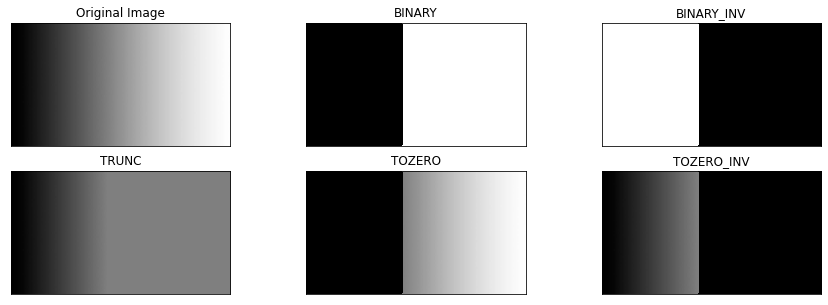

In [ ]:
fileGradient = '/content/drive/MyDrive/PCVK_MM/image/gradient.jpg';
img = cv.imread(fileGradient)
thresh1 = cv.imread(fileGradient)
thresh2 = cv.imread(fileGradient)
thresh3 = cv.imread(fileGradient)
thresh4 = cv.imread(fileGradient)
thresh5 = cv.imread(fileGradient)
thresh = 127 #nilai Threshold yang ditentukan
#Original Image
thresh1[img>thresh] = 255
thresh1[img<=thresh] = 0
#Binary threshold inverse
thresh2 = 255 - thresh1
#Threshold Truncate
thresh3[img>thresh] = thresh
#Threshold Tozero
thresh4[img<=thresh] = 0
#Threshold Tozero Inverse
thresh5[img>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


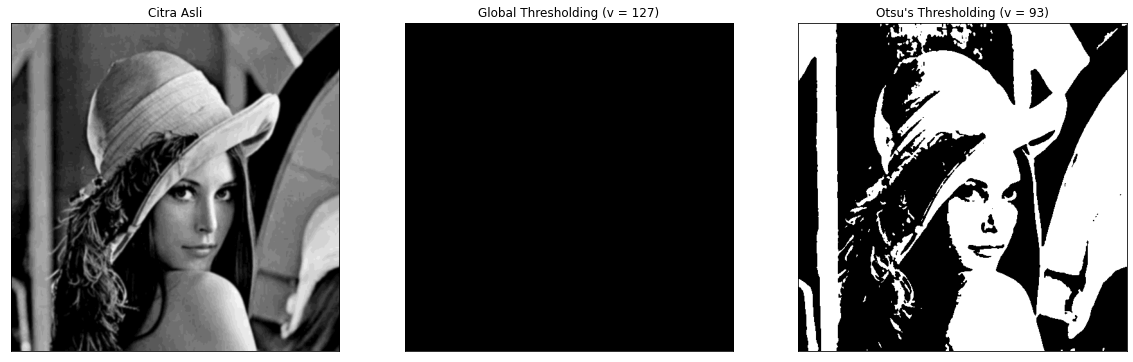

In [ ]:
fileLena = ('/content/drive/MyDrive/PCVK_MM/image/lena_gs_lc2.jpg')
img = cv.imread(fileLena,0)
blur = cv. GaussianBlur (img, (5,5),0)
hist = cv.calcHist([blur],[0],None,[256], [0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
3
thresh = -1
for i in range(0,255):
 wb += hist[i]
 wf = (img.shape[0]*img.shape[1]) - wb
 sumb += (i*hist[i])
 mb = sumb / wb
 mf = (sumb - sumb)/wf
 betweenvar = wb * wf * (mb - mf) * (mb - mf)
 if (betweenvar>varmax):
  varmax = betweenvar
  thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt. figure(figsize = (20,15))
for i in range(len(citra3)):
 plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

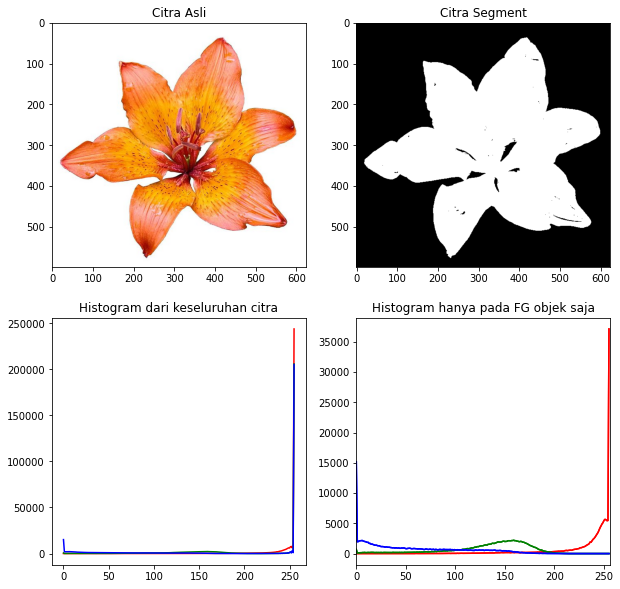

In [ ]:
fileLily = ('/content/drive/MyDrive/PCVK_MM/image/lily.jpg')
img = cv.imread(fileLily)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
 hist0 = cv.calcHist([img],[i],None,[256],[0,256])
 plt.subplot(2,2,3),plt.plot(hist0,color = col)
 plt.title('Histogram dari keseluruhan citra')
 hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
 plt.subplot(2,2,4),plt.plot(hist1,color = col)
 plt.title('Histogram dari keseluruhan citra')
 hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
 plt.subplot(2,2,4),plt.plot(hist1,color = col)
 plt.title('Histogram hanya pada FG objek saja')
 plt.xlim([0,256])
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f39ba53ba10>,
 <matplotlib.image.AxesImage at 0x7f39ba4a9510>)

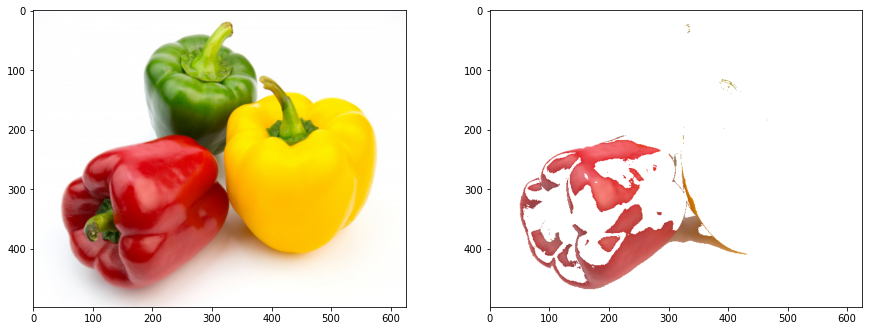

In [ ]:
#Nomor 6
filePeppers = ('/content/drive/MyDrive/PCVK_MM/image/peppers.jpg')
img_p = cv.imread(filePeppers) 
img_rgb2 = cv.cvtColor(img_p,cv.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

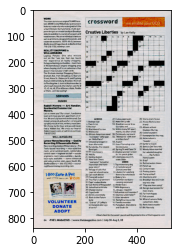

In [ ]:
#Nomor 7 TOZERO
img_c = cv.imread('/content/drive/MyDrive/PCVK_MM/image/crossword.jpg')
img_rgb3 = cv.cvtColor(img_c, cv.COLOR_BGR2RGB)

ret, thresh = cv.threshold(img_rgb3, 125, 255, cv.THRESH_TOZERO)

plt.imshow(thresh)
cv.waitKey(0)
cv.destroyAllWindows()

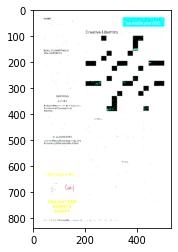

In [ ]:
#Nomor 7 THRESH BINARY
imgCross = ('/content/drive/MyDrive/PCVK_MM/image/crossword.jpg')
img = cv.imread(imgCross)
ret, thresh = cv.threshold(img, 51, 255, cv.THRESH_BINARY)
plt.imshow(thresh)